In [28]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns 
from keras.utils import to_categorical
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import random

In [29]:
keras = tf.keras

In [30]:
# Devuelve imágenes digitos escritos a mano en escala de grises
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train", X_train.shape)

X_train (60000, 28, 28)


In [31]:
# una imagen de un solo dígito en concreto
# cada valor de pixel tiene un número entre 0 y 255 (escala de 8 bits)
# se puede normalizar a escala 0-1 
single_image = X_train[1]
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [32]:
single_image.shape # una imagen de 28x28 px

(28, 28)

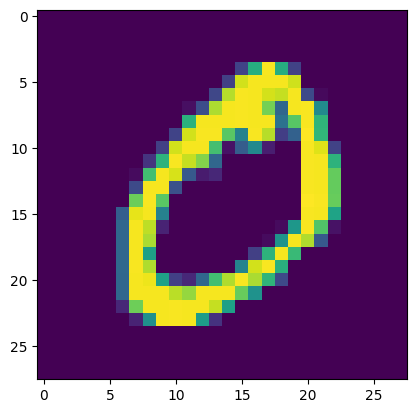

In [33]:
plt.imshow(single_image, cmap="viridis")

In [34]:
y_train # indica el dígito real que hay en la imagen

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [35]:
# pasamos la salida "y" a one-hot para poder usa métricas de clasificación en el entrenamiento
# hay 10 clases: 0 1 2 3 4 5 6 7 8 9
y_train_onehot = keras.utils.to_categorical(y_train, num_classes=10)
y_test_onehot = keras.utils.to_categorical(y_test, num_classes=10)
y_train_onehot[:1]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]])

In [36]:
# Opcional:  normalizar la entrada X a [0 - 1] para que tarde menos la red neuronal en entrenar
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0
X_train[:5]

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

    

In [37]:
# aplanar la entrada manualmente , para que tenga 2D ya que las capas Dense necesitan 2D en la X
# X_train_flatten = X_train.reshape(-1, 28*28)
# X_test_flatten = X_test.reshape(-1, 28*28)
# X_train_flatten[:10]
# alternativa: aplanarla en el modelo con una capa Flatten

### Red Neuronal normal

Al aplanar las imágenes 28 x 28 -> 784, la red pierde información espacial de los píxeles, es decir, no aprovecha la estructura 2D de las imágenes.

In [38]:
# 0. random state
keras.backend.clear_session()
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)
random.seed(seed)

# Arquitectura
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax') # clasificación multiclase con 10 neuronas
])

# Alternativa usando también Sequential pero agregando las capas por separado
# model = keras.Sequential()
# model.add(keras.layers.Dense(64, activation='relu'))
# model.add(keras.layers.Dense(64, activation='relu'))
# model.add(keras.layers.Dense(10, activation='softmax') )

# Compile
model.compile(
    loss=keras.losses.CategoricalCrossentropy(), 
    optimizer=keras.optimizers.Adam(),
    metrics=[
        'accuracy',
        keras.metrics.Precision(),
        keras.metrics.Recall(),
        keras.metrics.AUC()
        ]
)


# Opcional: para interrumpir el fit automáticamente si no mejora tras X epochs
early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss', # métrica a revisar para decidir interrumpir el fit
    patience=10, # numero de epochs que tienen que transcurrir sin mejora para interrumpir fit
    mode='min', # 'min' para minimizar el val_loss, 'max' si queremos maximizar
    verbose=1,
    restore_best_weights=True # restaura los mejores pesos del epoch antes de ver que no mejora
)

# Entrenar
model.fit(X_train, y_train_onehot, validation_split=0.2, epochs=100, verbose=1, batch_size=32, callbacks=[early_stop])

Epoch 1/100


C:\Users\carme\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8515 - auc: 0.9760 - loss: 0.5337 - precision: 0.9269 - recall: 0.7563 - val_accuracy: 0.9528 - val_auc: 0.9965 - val_loss: 0.1624 - val_precision: 0.9617 - val_recall: 0.9447
Epoch 2/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9552 - auc: 0.9971 - loss: 0.1509 - precision: 0.9635 - recall: 0.9475 - val_accuracy: 0.9623 - val_auc: 0.9970 - val_loss: 0.1345 - val_precision: 0.9683 - val_recall: 0.9580
Epoch 3/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9690 - auc: 0.9982 - loss: 0.1067 - precision: 0.9741 - recall: 0.9647 - val_accuracy: 0.9649 - val_auc: 0.9972 - val_loss: 0.1235 - val_precision: 0.9694 - val_recall: 0.9613
Epoch 4/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9765 - auc: 0.9987 - loss: 0.0814 - precision: 0.9803 - recall: 0.9729 - val_accuracy: 0.9684 - val_auc: 0.9969 - val_loss: 0.1177 - val_precision: 0.9718 - val_recall: 0.9650
Epoch 5/100
1500/1500 ━━━━━━━━━━

In [39]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 165,152 (645.13 KB)

 Trainable params: 55,050 (215.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 110,102 (430.09 KB)

In [40]:
df_history = pd.DataFrame(model.history.history)
df_history.head()

,accuracy,auc,loss,precision,recall,val_accuracy,val_auc,val_loss,val_precision,val_recall
0,0.912917,0.992709,0.308012,0.945123,0.877271,0.952833,0.996546,0.162430,0.961738,0.944667
1,0.957583,0.997309,0.142725,0.965213,0.950896,0.962333,0.996994,0.134494,0.968329,0.958000
2,0.970479,0.998201,0.103162,0.975103,0.966083,0.964917,0.997249,0.123499,0.969412,0.961333
3,0.976542,0.998685,0.079817,0.980053,0.973458,0.968417,0.996935,0.117727,0.971803,0.965000
4,0.981396,0.999070,0.063317,0.984150,0.979208,0.966000,0.996863,0.120310,0.968360,0.964083


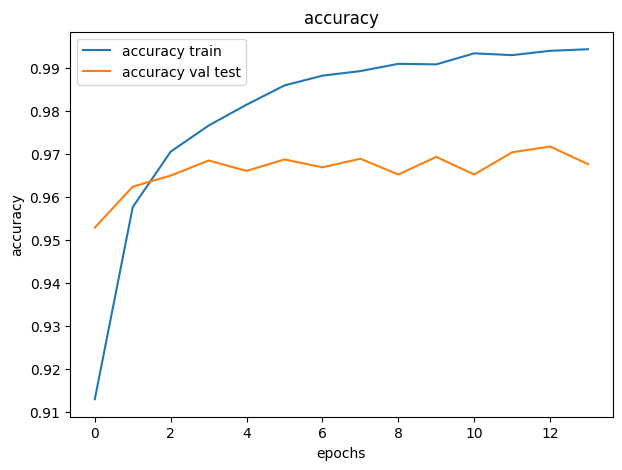

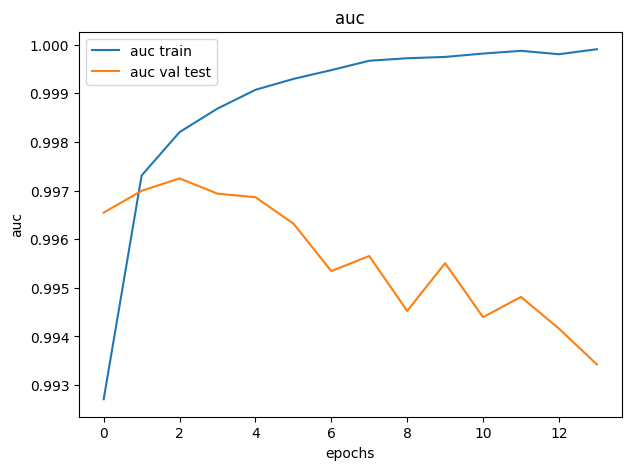

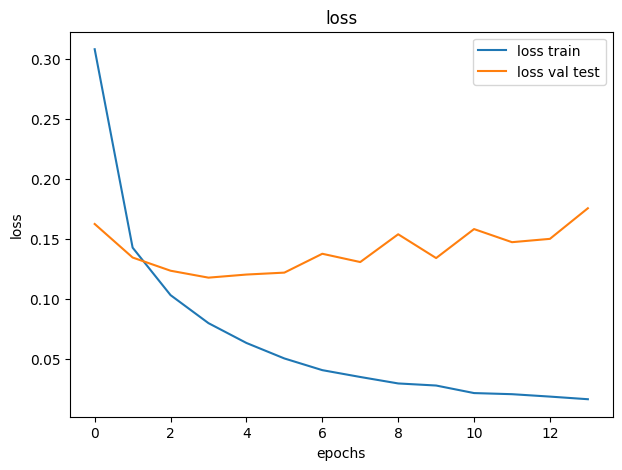

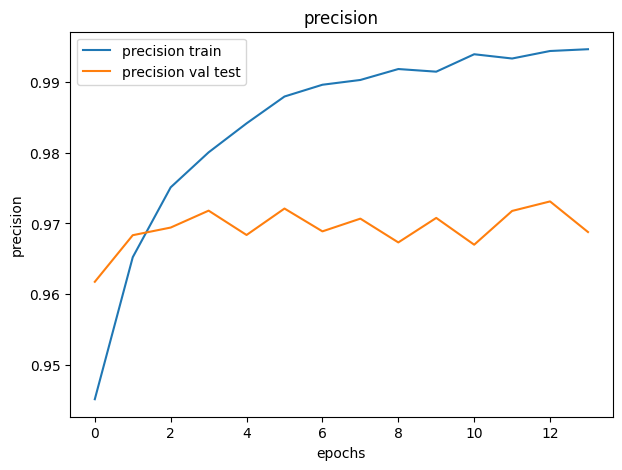

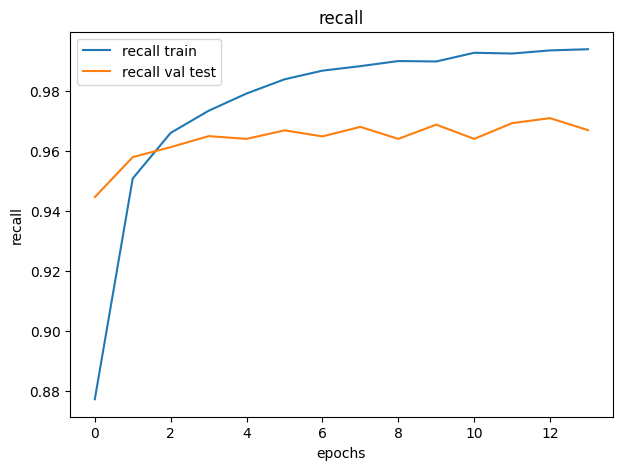

In [41]:
def plot_history(df_history): # Función genérica
    '''
    Dado un DataFrame con el history de entrenamiendo de una red (model.history.history)
    genera gráficas de todas las métricas disponibles. Muestra un gráfico por cada par de métricas ejemplo: 
    * loss y val_loss
    * mean_absolute_error y val_mean_absolute_error
    '''
    train_metrics = [col for col in df_history.columns if not col.startswith('val_')]
    for metric in train_metrics:
        plt.figure(figsize=(7, 5))
        plt.plot(df_history[metric], label=f'{metric} train')
        
        val_metric = f'val_{metric}'
        if val_metric in df_history.columns:
            plt.plot(df_history[val_metric], label=f'{metric} val test')
            
        plt.title(metric)
        plt.xlabel('epochs')
        plt.ylabel(metric)
        plt.legend()
        plt.show()
        
plot_history(df_history)

In [42]:
model .predict(X_test)[:5] # probabilidades

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step


array([[1.30393147e-07, 7.76449660e-09, 6.37956618e-05, 2.35291183e-04,
        3.29171196e-12, 6.29647730e-08, 1.71107188e-13, 9.99700546e-01,
        6.58660468e-08, 1.56653954e-07],
       [1.73480430e-07, 7.81357303e-05, 9.99724925e-01, 1.10847344e-04,
        1.08617804e-09, 6.02752261e-05, 1.34866987e-05, 4.81158535e-09,
        1.20763552e-05, 1.23039317e-12],
       [6.26301335e-06, 9.77540672e-01, 1.12225791e-03, 3.26847257e-05,
        7.65689838e-05, 1.62096439e-05, 2.55516090e-04, 2.06145551e-02,
        3.33997159e-04, 1.29991838e-06],
       [9.99640346e-01, 2.72496709e-06, 2.58113054e-04, 4.90822786e-05,
        1.33277024e-06, 2.75881121e-06, 6.48743890e-06, 2.67217856e-05,
        1.07450633e-05, 1.71740919e-06],
       [1.51593949e-05, 6.46680855e-05, 2.98504347e-07, 1.24940726e-07,
        9.97949183e-01, 9.52977246e-07, 4.72423653e-06, 2.08763595e-05,
        2.99138537e-06, 1.94106053e-03]], dtype=float32)

In [43]:
y_pred = np.argmax(model.predict(X_test), axis=1)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 631us/step


array([7, 2, 1, 0, 4])

In [44]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.98      0.99      1135
           2       0.98      0.97      0.97      1032
           3       0.93      0.98      0.96      1010
           4       0.99      0.95      0.97       982
           5       0.97      0.96      0.96       892
           6       0.98      0.97      0.98       958
           7       0.95      0.98      0.97      1028
           8       0.95      0.95      0.95       974
           9       0.96      0.94      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [45]:
df_comparision = pd.DataFrame({"real": y_test, "prediccion": y_pred})
df_comparision.head()

,real,prediccion
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4


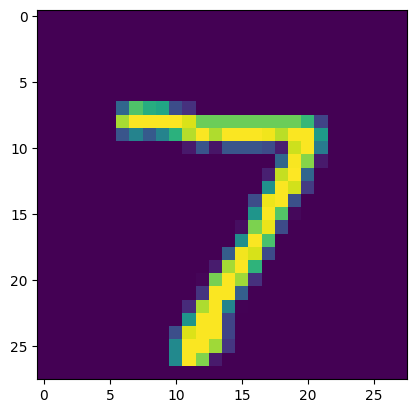

In [46]:
plt.imshow(X_test[0].reshape(28,28), cmap="viridis")

In [49]:
X_test.shape

(10000, 28, 28)

In [50]:
X_test[0].shape

(28, 28)

In [51]:
# pasar una imagen a 3D para que luego el Flatten haga su trabajo
image_to_predict = X_test[0].reshape(1, 28, 28)
image_to_predict.shape

(1, 28, 28)

In [52]:
# Hacer predicción
model.predict(image_to_predict)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


array([[1.3039340e-07, 7.7644966e-09, 6.3795727e-05, 2.3529118e-04,
        3.2917308e-12, 6.2964894e-08, 1.7110785e-13, 9.9970055e-01,
        6.5866175e-08, 1.5665441e-07]], dtype=float32)

In [53]:
np.argmax(model.predict(image_to_predict), axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


array([7])

### Red Neuronal de convolución: CNN



In [ ]:
X_train.shape # 3D, pero necesitamos 4D para la CNN

(60000, 28, 28)

In [57]:
# Redimensionar X para CNN (canal de color = 1) 4D
# num_samples, 28, 28, 1 canal de color (1 para escala de grises o 3 para RGB)
# Las capas CNN eesperan entradas en formato 4D (batch_size, height, width, channels)
X_train_cnn = X_train.reshape(-1, 28, 28, 1)
X_test_cnn = X_test.reshape(-1, 28, 28, 1)
X_train_cnn.shape

(60000, 28, 28, 1)

In [59]:
keras.backend.clear_session()
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)
random.seed(seed)

# Arquitectura
model = keras.Sequential([
    #primera capa convolucional
    keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    keras.layers.Flatten(), # aplanado
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax') # clasificación multiclase con 10 neuronas
])

# Alternativa usando también Sequential pero agregando las capas por separado
# model = keras.Sequential()
# model.add(keras.layers.Dense(64, activation='relu'))
# model.add(keras.layers.Dense(64, activation='relu'))
# model.add(keras.layers.Dense(10, activation='softmax') )

# Compile
model.compile(
    loss=keras.losses.CategoricalCrossentropy(), 
    optimizer=keras.optimizers.Adam(),
    metrics=[
        'accuracy',
        keras.metrics.Precision(),
        keras.metrics.Recall(),
        keras.metrics.AUC()
        ]
)


# Opcional: para interrumpir el fit automáticamente si no mejora tras X epochs
early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss', # métrica a revisar para decidir interrumpir el fit
    patience=10, # numero de epochs que tienen que transcurrir sin mejora para interrumpir fit
    mode='min', # 'min' para minimizar el val_loss, 'max' si queremos maximizar
    verbose=1,
    restore_best_weights=True # restaura los mejores pesos del epoch antes de ver que no mejora
)

# entrenar
model.fit(X_train_cnn, y_train_onehot, validation_split=0.2, epochs=10, verbose=1, batch_size=32, callbacks=[early_stop]) 

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8580 - auc: 0.9774 - loss: 0.4614 - precision: 0.9240 - recall: 0.7948 - val_accuracy: 0.9794 - val_auc: 0.9989 - val_loss: 0.0726 - val_precision: 0.9821 - val_recall: 0.9769
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9783 - auc: 0.9990 - loss: 0.0715 - precision: 0.9817 - recall: 0.9763 - val_accuracy: 0.9822 - val_auc: 0.9988 - val_loss: 0.0635 - val_precision: 0.9850 - val_recall: 0.9808
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9853 - auc: 0.9993 - loss: 0.0486 - precision: 0.9874 - recall: 0.9839 - val_accuracy: 0.9833 - val_auc: 0.9986 - val_loss: 0.0613 - val_precision: 0.9851 - val_recall: 0.9814
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9881 - auc: 0.9995 - loss: 0.0376 - precision: 0.9894 - recall: 0.9873 - val_accuracy: 0.9859 - val_auc: 0.9985 - val_loss: 0.0528 - val_precision: 0.9868 - val_recall: 0.9845
Epoch 5/10
1500/1500 ━━━